In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
device 

In [ ]:
# set parameter

learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
#MNIST dataset
mnist_train = dsets.MNIST(root = 'MNIST_data',
                          train = True,
                          transform = transforms.ToTensor(),
                          download = True)
mnist_test = dsets.MNIST(root= 'MNIST_data',
                          train = False,
                          transform = transforms.ToTensor(),
                          download = True)

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          drop_last = True)

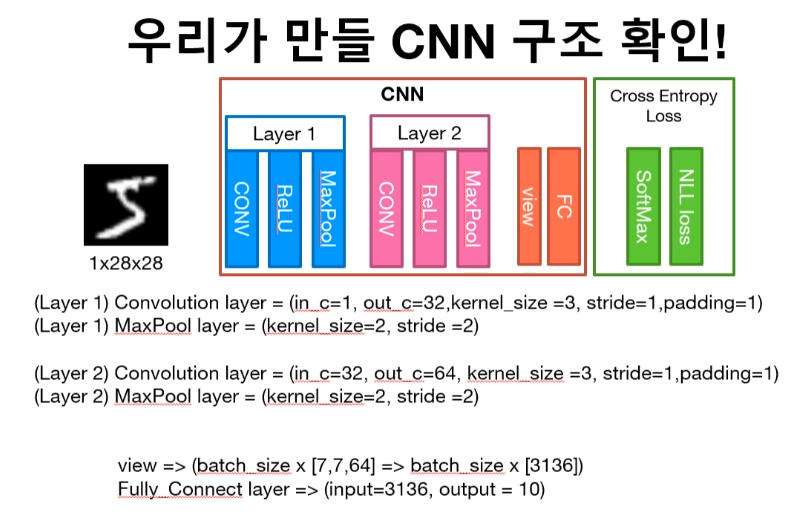

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,32,3,1,padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32,64,3,1,padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2))
        self.fc = nn.Linear(7*7*64, 10, bias = True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        
        out = out.view(out.size(0),-1)
        out = self.fc(out)
        return out

In [ ]:
model = CNN().to(device)

In [ ]:
model

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
#training

total_batch = len(data_loader)

for epoch in range(training_epochs):
    avg_cost = 0

    for X,Y in data_loader:
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)

        cost = criterion(hypothesis,Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batch

    print(f'[Epoch:{epoch +1 }] cost = {avg_cost}')
print('Learning_Finished')

In [ ]:
with torch.no_grad():
    X_test = mnist_test.data.view(len(mnist_test), 1,28,28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy',accuracy.item())

# 만약 층을 깊게하면 더 잘 학습하지 않을까?

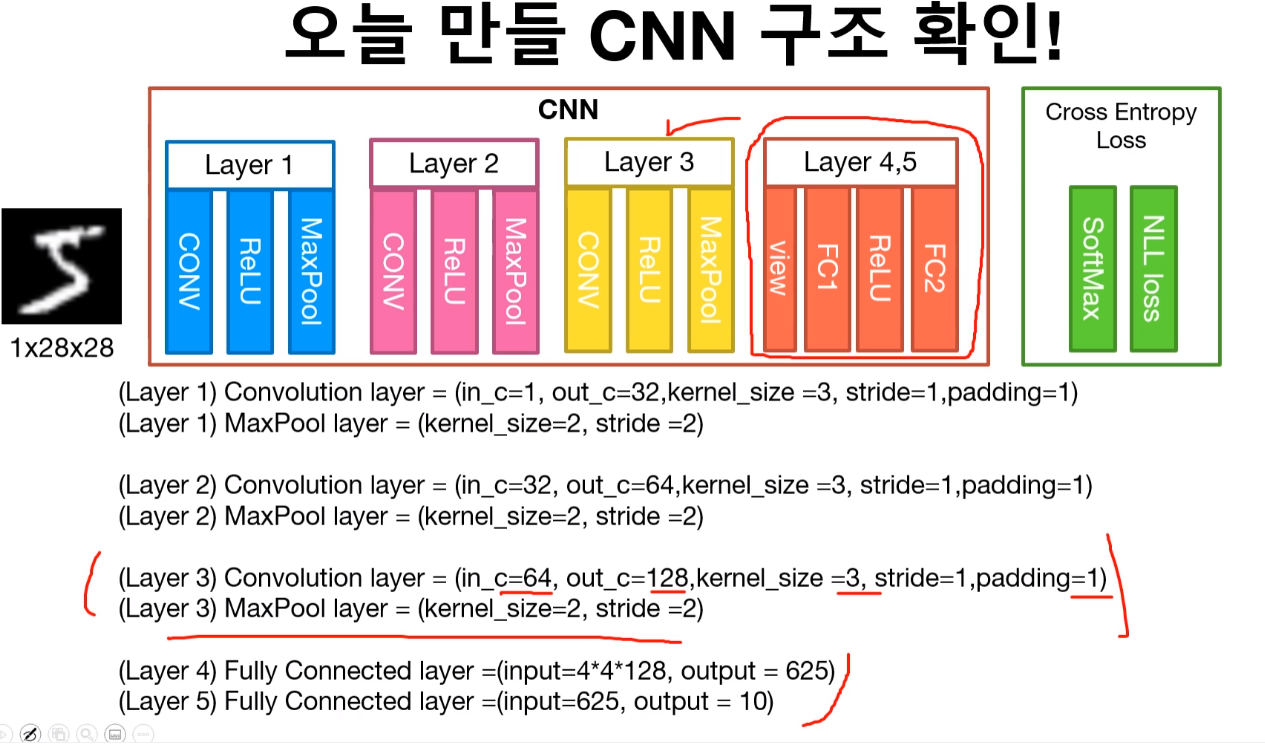

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,32,3,1,padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32,64,3,1,padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128,3,1,padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.fc1 = nn.Linear(3*3*128, 625)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(625, 10, bias = True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)


    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        
        out = out.view(out.size(0),-1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [ ]:
model = CNN().to(device)

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
#training

total_batch = len(data_loader)

for epoch in range(training_epochs):
    avg_cost = 0

    for X,Y in data_loader:
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)

        cost = criterion(hypothesis,Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batch

    print(f'[Epoch:{epoch +1 }] cost = {avg_cost}')
print('Learning_Finished')

In [ ]:
with torch.no_grad():
    X_test = mnist_test.data.view(len(mnist_test), 1,28,28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy',accuracy.item())

## 결론 : 꼭 층을 깊게 쌓는다고 학습이 잘되지 않는다